In [1]:
import lightgbm as lgb
from catboost import CatBoostClassifier
import os
import time
notebookstart= time.time()
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import xgboost as xgb
from sklearn.model_selection import train_test_split
from subprocess import check_output
import pandas as pd
data=pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [3]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

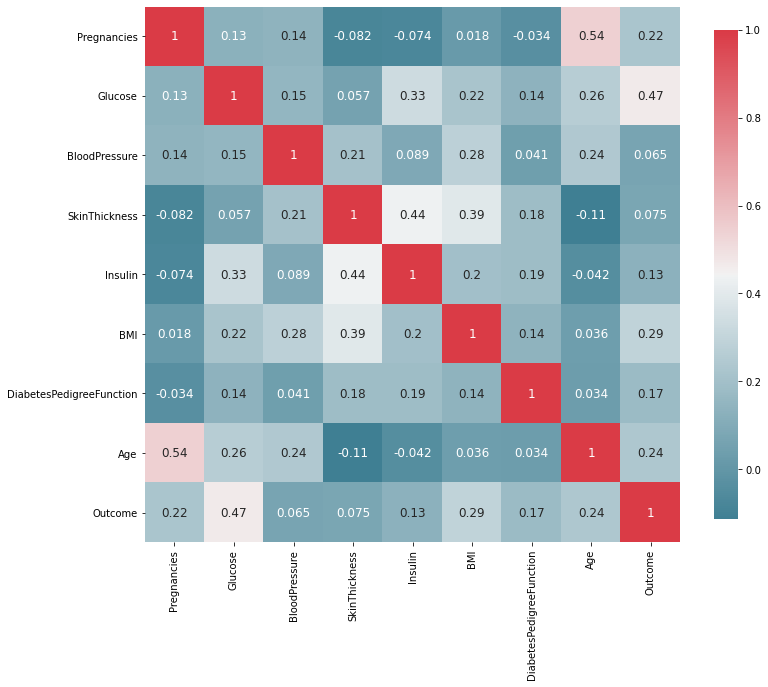

In [4]:
plot_correlation_map( data )

In [5]:
data_full = data.copy()
X_data = data_full.drop('Outcome', axis=1)
y = data_full.Outcome

In [6]:
X_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [7]:
seed = 7
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=test_size, random_state=seed)

In [8]:
model1 = xgb.XGBClassifier()
model2 = xgb.XGBClassifier(n_estimators=10, max_depth=3, learning_rate=0.1, subsample=0.5)

train_model1 = model1.fit(X_train, y_train)
train_model2 = model2.fit(X_train, y_train)

F:\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:03:17] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:03:18] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [9]:
from sklearn.metrics import classification_report

pred1 = train_model1.predict(X_test)
pred2 = train_model2.predict(X_test)

print(classification_report(y_test,pred1))
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.77      0.82      0.79       147
           1       0.64      0.58      0.61        84

    accuracy                           0.73       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.73      0.73      0.73       231

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       147
           1       0.68      0.62      0.65        84

    accuracy                           0.76       231
   macro avg       0.74      0.73      0.73       231
weighted avg       0.75      0.76      0.75       231



F:\anaconda\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [10]:
pred3 = train_model1.predict(X_train)
pred4 = train_model2.predict(X_train)

print(classification_report(y_train,pred3))
print(classification_report(y_train,pred4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       353
           1       1.00      1.00      1.00       184

    accuracy                           1.00       537
   macro avg       1.00      1.00      1.00       537
weighted avg       1.00      1.00      1.00       537

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       353
           1       0.78      0.61      0.69       184

    accuracy                           0.81       537
   macro avg       0.80      0.76      0.78       537
weighted avg       0.81      0.81      0.80       537



F:\anaconda\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [11]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier(
    iterations=4, 
    learning_rate=0.9,
    #loss_function='CrossEntropy'
)


clf.fit(X_train, y_train,  
        eval_set=(X_train, y_train), 
        verbose=False
)

print('CatBoost model is fitted: ' + str(clf.is_fitted()))
print('CatBoost model parameters:')
print(clf.get_params())

CatBoost model is fitted: True
CatBoost model parameters:
{'iterations': 4, 'learning_rate': 0.9}


In [12]:
pred5=clf.predict(data=X_test)

In [13]:
print(classification_report(y_test,pred5))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       147
           1       0.68      0.60      0.64        84

    accuracy                           0.75       231
   macro avg       0.73      0.72      0.73       231
weighted avg       0.75      0.75      0.75       231



In [14]:
pred6=clf.predict(data=X_train)

In [15]:
print(classification_report(y_train,pred6))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       353
           1       0.77      0.61      0.68       184

    accuracy                           0.80       537
   macro avg       0.79      0.76      0.77       537
weighted avg       0.80      0.80      0.80       537



In [16]:
CLF = lgb.LGBMClassifier()
CLF.fit(X_train, y_train)

LGBMClassifier()

In [17]:
pred7=CLF.predict(X_test)

In [18]:
print(classification_report(y_test,pred7))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       147
           1       0.65      0.63      0.64        84

    accuracy                           0.74       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



In [19]:
pred8=CLF.predict(X_train)

In [20]:
print(classification_report(y_train,pred8))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       353
           1       1.00      1.00      1.00       184

    accuracy                           1.00       537
   macro avg       1.00      1.00      1.00       537
weighted avg       1.00      1.00      1.00       537



In [21]:
CLF2 = lgb.LGBMClassifier(max_depth=2,learning_rate=0.1, n_estimators=50)
CLF2.fit(X_train, y_train)

LGBMClassifier(max_depth=2, n_estimators=50)

In [22]:
pred9=CLF2.predict(X_train)

In [23]:
print(classification_report(y_train,pred9))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       353
           1       0.79      0.67      0.72       184

    accuracy                           0.82       537
   macro avg       0.81      0.79      0.80       537
weighted avg       0.82      0.82      0.82       537



In [24]:
pred10=CLF2.predict(X_test)

In [25]:
print(classification_report(y_test,pred10))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       147
           1       0.71      0.68      0.70        84

    accuracy                           0.78       231
   macro avg       0.77      0.76      0.76       231
weighted avg       0.78      0.78      0.78       231



In [37]:
pred = pd.DataFrame({"predLGBM":pred10,"XGBPred":pred2,"CatBoostPred":pred5})

In [38]:
def fn(l):
    d = {"1":0,"0":0}
    for i in l:
        if i==1:
            d['1']+=1
        else:
            d['0']+=1
    if d['1']>d['0']:
        return 1
    else:
        return 0
    return d

In [39]:
d = fn([1,0,0])

In [40]:
d

0

In [45]:
pred['voting']=pred.apply(fn,axis=1)

In [46]:
pred

,predLGBM,XGBPred,CatBoostPred,voting
0,0,0,0,0
1,1,1,1,1
2,1,0,1,1
3,0,0,0,0
4,1,0,0,0
...,...,...,...,...
226,0,0,0,0
227,1,1,1,1
228,1,1,1,1
229,0,0,0,0


In [47]:
print(classification_report(y_test,pred['voting']))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       147
           1       0.69      0.64      0.67        84

    accuracy                           0.77       231
   macro avg       0.75      0.74      0.74       231
weighted avg       0.76      0.77      0.76       231

